# FULL PROJECT ON THE TIMESERIES CLASSIFICATION, TO PREDICT ON THE ONSET OF ALZHEIMER'S DISEASES USING CNVOLUTIONAL NEURAL NETWORK

In [1]:
#importing all the necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

### Data Collection 

In [2]:
#load the dataset
df = pd.read_csv('investigator_nacc61.csv')

C:\Users\t\AppData\Local\Temp\ipykernel_12836\3749981481.py:2: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('investigator_nacc61.csv')


In [3]:
# check the dimension of the data
df.shape

(177112, 1024)

In [4]:
#to avoid warnings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
#printing the list of columns present
print(df.columns.tolist())

['NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS', 'NACCCORE', 'NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'HISPORX', 'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'PRIMLANG', 'PRIMLANX', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF', 'INHISP', 'INHISPOR', 'INHISPOX', 'NACCNINR', 'INRACE', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX', 'INEDUC', 'INRELTO', 'INRELTOX', 'INKNOWN', 'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX', 'NACCOM', 'NACCOMX', 'NACCOMS', 'NACCOMSX', 'NACCFADM', 'NACCFFTD', 'ANYMEDS', 'DRUG1', 'DRUG2', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6', 'DRUG7', 'DRUG8', 'DRUG9', 'DRUG10', 'DRUG11', 'DRUG12', 'DRUG13', 'DRUG14', 'DRUG15', 'DRUG16', 'DRUG17', 'DRUG18'

In [6]:
df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,HISPORX,RACE,RACEX,RACESEC,RACESECX,RACETER,RACETERX,PRIMLANG,PRIMLANX,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INHISPOX,NACCNINR,INRACE,INRACEX,INRASEC,INRASECX,INRATER,INRATERX,INEDUC,INRELTO,INRELTOX,INKNOWN,INLIVWTH,INVISITS,INCALLS,INRELY,NACCFAM,NACCMOM,NACCDAD,NACCAM,NACCAMX,NACCAMS,NACCAMSX,NACCFM,NACCFMX,NACCFMS,NACCFMSX,NACCOM,NACCOMX,NACCOMS,NACCOMSX,NACCFADM,NACCFFTD,ANYMEDS,DRUG1,DRUG2,DRUG3,DRUG4,DRUG5,DRUG6,DRUG7,DRUG8,DRUG9,DRUG10,DRUG11,DRUG12,DRUG13,DRUG14,DRUG15,DRUG16,DRUG17,DRUG18,DRUG19,DRUG20,DRUG21,DRUG22,DRUG23,DRUG24,DRUG25,DRUG26,DRUG27,DRUG28,DRUG29,DRUG30,DRUG31,DRUG32,DRUG33,DRUG34,DRUG35,DRUG36,DRUG37,DRUG38,DRUG39,DRUG40,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOCCAS,ALCFREQ,CVHATT,HATTMULT,HATTYEAR,CVAFIB,CVANGIO,CVBYPASS,CVPACDEF,CVPACE,CVCHF,CVANGINA,CVHVALVE,CVOTHR,CVOTHRX,CBSTROKE,STROKMUL,NACCSTYR,CBTIA,TIAMULT,NACCTIYR,PD,PDYR,PDOTHR,PDOTHRYR,SEIZURES,NACCTBI,TBI,TBIBRIEF,TRAUMBRF,TBIEXTEN,TRAUMEXT,TBIWOLOS,TRAUMCHR,TBIYEAR,NCOTHR,NCOTHRX,DIABETES,DIABTYPE,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ARTHTYPE,ARTHTYPX,ARTHUPEX,ARTHLOEX,ARTHSPIN,ARTHUNK,INCONTU,INCONTF,APNEA,RBD,INSOMN,OTHSLEEP,OTHSLEEX,ALCOHOL,ABUSOTHR,ABUSX,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,PSYCDISX,HEIGHT,WEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,CVDIMAGX,PDNORMAL,SPEECH,SPEECHX,FACEXP,FACEXPX,TRESTFAC,TRESTFAX,TRESTRHD,TRESTRHX,TRESTLHD,TRESTLHX,TRESTRFT,TRESTRFX,TRESTLFT,TRESTLFX,TRACTRHD,TRACTRHX,TRACTLHD,TRACTLHX,RIGDNECK,RIGDNEX,RIGDUPRT,RIGDUPRX,RIGDUPLF,RIGDUPLX,RIGDLORT,RIGDLORX,RIGDLOLF,RIGDLOLX,TAPSRT,TAPSRTX,TAPSLF,TAPSLFX,HANDMOVR,HANDMVRX,HANDMOVL,HANDMVLX,HANDALTR,HANDATRX,HANDALTL,HANDATLX,LEGRT,LEGRTX,LEGLF,LEGLFX,ARISING,ARISINGX,POSTURE,POSTUREX,GAIT,GAITX,POSSTAB,POSSTABX,BRADYKIN,BRADYKIX,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRSUM,CDRGLOB,COMPORT,CDRLANG,NPIQINF,NPIQINFX,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,DEPD,DEPDSEV,ANX,ANXSEV,ELAT,ELATSEV,APA,APASEV,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV,NOGDS,SATIS,DROPACT,EMPTY,BORED,SPIRITS,AFRAID,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,NACCGDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCNREX,NORMEXAM,FOCLDEF,GAITDIS,EYEMOVE,PARKSIGN,RESTTRL,RESTTRR,SLOWINGL,SLOWINGR,RIGIDL,RIGIDR,BRADY,PARKGAIT,POSTINST,CVDSIGNS,CORTDEF,SIVDFIND,CVDMOTL,CVDMOTR,CORTVISL,CORTVISR,SOMATL,SOMATR,POSTCORT,PSPCBS,EYEPSP,DYSPSP,AXIALPSP,GAITPSP,APRAXSP,APRAXL,APRAXR,CORTSENL,CORTSENR,ATAXL,ATAXR,ALIENLML,ALIENLMR,DYSTONL,DYSTONR,MYOCLLT,MYOCLRT,ALSFIND,GAITNPH,OTHNEUR,OTHNEURX,B9CHG,DECSUB,DECIN,DECCLIN,DECCLCOG,COGMEM,COGORI,COGJUDG,COGLANG,COGVIS,COGATTN,COGFLUC,COGFLAGO,COGOTHR,COGOTHRX,NACCCOGF,NACCCGFX,COGMODE,COGMODEX,DECAGE,DECCLBE,BEAPATHY,BEDEP,BEVHALL,BEVWELL,BEVHAGO,BEAHALL,BEDEL,BEDISIN,BEIRRIT,BEAGIT,BEPERCH,BEREM,BEREMAGO,BEANX,BEOTHR,BEOTHRX,NACCBEHF,NACCBEFX,BEMODE,BEMODEX,BEAGE,DECCLMOT,MOGAIT,MOFALLS,MOTREM,MOSLOW,NACCMOTF,MOMODE,MOMODEX,MOMOPARK,PARKAGE,MOMOALS,ALSAGE,MOAGE,COURSE,FRSTCHG,LBDEVAL,FTLDEVAL,MMSECOMP,MMSELOC,MMSELAN,MMSELANX,MMSEVIS,MMSEHEAR,MMSEORDA,MMSEORLO,PENTAGON,NACCMMSE,NPSYCLOC,NPSYLAN,NPSYLANX,LOGIMO,LOGIDAY,LOGIYR,LOGIPREV,LOGIMEM,MEMUNITS,MEMTIME,UDSBENTC,UDSBENTD,UDSBENRS,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,BOSTON,UDSVERFC,UDSVERFN,UDSVERNF,UDSVERLC,UDSVERLR,UDSVERLN,UDSVERTN,UDSVERTE,UDSVERTI,COGSTAT,NACCC1,MOCACOMP,MOCAREAS,MOCALOC,MOCALAN,MOCALANX,MOCAVIS,MOCAHEAR,MOCATOTS,MOCATRAI,MOCACUBE,MOCACLOC,MOCACLON,MOCACLOH,MOCANAMI,MOCAREGI,MOCADIGI,MOCALETT,MOCASER7,MOCAREPE,MOCAFL

In [7]:
#checking the data types of the columns present in the dataset
df.dtypes

NACCID        object
NACCADC        int64
PACKET        object
FORMVER      float64
VISITMO        int64
VISITDAY       int64
VISITYR        int64
NACCVNUM       int64
NACCAVST       int64
NACCNVST       int64
NACCDAYS       int64
NACCFDYS       int64
NACCCORE       int64
NACCREAS       int64
NACCREFR       int64
BIRTHMO        int64
BIRTHYR        int64
SEX            int64
HISPANIC       int64
HISPOR         int64
HISPORX       object
RACE           int64
RACEX         object
RACESEC        int64
RACESECX      object
RACETER        int64
RACETERX      object
PRIMLANG       int64
PRIMLANX      object
EDUC           int64
MARISTAT       int64
NACCLIVS       int64
INDEPEND       int64
RESIDENC       int64
HANDED         int64
INBIRMO        int64
INBIRYR        int64
INSEX          int64
NEWINF         int64
INHISP         int64
INHISPOR       int64
INHISPOX      object
NACCNINR       int64
INRACE         int64
INRACEX       object
INRASEC        int64
INRASECX      object
INRATER      

### Data preprocessing

In [8]:
#checking for missing values
df.isnull().sum()

NACCID            0
NACCADC           0
PACKET            0
FORMVER           0
VISITMO           0
VISITDAY          0
VISITYR           0
NACCVNUM          0
NACCAVST          0
NACCNVST          0
NACCDAYS          0
NACCFDYS          0
NACCCORE          0
NACCREAS          0
NACCREFR          0
BIRTHMO           0
BIRTHYR           0
SEX               0
HISPANIC          0
HISPOR            0
HISPORX      176656
RACE              0
RACEX        174977
RACESEC           0
RACESECX     176850
RACETER           0
RACETERX     177092
PRIMLANG          0
PRIMLANX     174611
EDUC              0
MARISTAT          0
NACCLIVS          0
INDEPEND          0
RESIDENC          0
HANDED            0
INBIRMO           0
INBIRYR           0
INSEX             0
NEWINF            0
INHISP            0
INHISPOR          0
INHISPOX     176926
NACCNINR          0
INRACE            0
INRACEX      175649
INRASEC           0
INRASECX     176864
INRATER           0
INRATERX     177060
INEDUC            0


In [9]:
#step 1: handling missing values, encoding categorical variables

def preprocess_data(data):
    # Drop irrelevant columns if needed
       
    # Handle missing values
    data = handle_missing_values(data)

    # Encode categorical variables
    data = encode_categorical_variables(data)


   
    return data

def handle_missing_values(data):
    # Calculate the sum of missing values in each column
    missing_values = data.isnull().sum()

    # Get the column names with missing values
    columns_with_missing_values = missing_values[missing_values > 500].index 
    """columns with too much missing values are removed,
    and also filling with mean or mode could lead to biases, hence the removal"""
    # Remove columns with missing values from the DataFrame
    data = data.drop(columns=columns_with_missing_values)

    # dropping rows with missing values
    data = data.dropna()
    

    return data

def encode_categorical_variables(data):
    # Iterate over columns and encode categorical variables
    for column in data.select_dtypes(include='object'):
        encode = LabelEncoder()
        data[column] = data[column].astype(str)
        data[column] = encode.fit_transform(data[column])

    return data




# Preprocess the data
processed_df = preprocess_data(df)


In [10]:
#step 2: Converting the day, month and year into datetime 
import pandas as pd

processed_df['year'] = processed_df['VISITYR'].astype(str) # assigning new variables 
processed_df['month'] = processed_df['VISITMO'].astype(str)
processed_df['day'] = processed_df['VISITDAY'].astype(str)

# Combine day, month, and year columns into a single 'Date' column
processed_df['Date'] = pd.to_datetime(processed_df[['year', 'month', 'day']], format='%Y-%m-%d')

# Sort the dataset based on the date column
processed_df.sort_values('Date', inplace=True)

#drop the unneeded columns since a date column has been formed
final_processed_df = processed_df.drop(['VISITDAY', 'VISITMO', 'VISITYR', 'year', 'month', 'day'], axis=1)

In [11]:
#checking the final processed data
final_processed_df.head()

,NACCID,NACCADC,PACKET,FORMVER,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,NACCNINR,INRACE,INRASEC,INRATER,INEDUC,INRELTO,INKNOWN,INLIVWTH,INVISITS,INCALLS,INRELY,NACCFAM,NACCMOM,NACCDAD,NACCAM,NACCAMS,NACCFM,NACCFMS,NACCOM,NACCOMS,NACCFADM,NACCFFTD,ANYMEDS,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOCCAS,ALCFREQ,CVHATT,HATTMULT,HATTYEAR,CVAFIB,CVANGIO,CVBYPASS,CVPACDEF,CVPACE,CVCHF,CVANGINA,CVHVALVE,CVOTHR,CBSTROKE,STROKMUL,NACCSTYR,CBTIA,TIAMULT,NACCTIYR,PD,PDYR,PDOTHR,PDOTHRYR,SEIZURES,NACCTBI,TBI,TBIBRIEF,TRAUMBRF,TBIEXTEN,TRAUMEXT,TBIWOLOS,TRAUMCHR,TBIYEAR,NCOTHR,DIABETES,DIABTYPE,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ARTHTYPE,ARTHUPEX,ARTHLOEX,ARTHSPIN,ARTHUNK,INCONTU,INCONTF,APNEA,RBD,INSOMN,OTHSLEEP,ALCOHOL,ABUSOTHR,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,HEIGHT,WEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,PDNORMAL,SPEECH,FACEXP,TRESTFAC,TRESTRHD,TRESTLHD,TRESTRFT,TRESTLFT,TRACTRHD,TRACTLHD,RIGDNECK,RIGDUPRT,RIGDUPLF,RIGDLORT,RIGDLOLF,TAPSRT,TAPSLF,HANDMOVR,HANDMOVL,HANDALTR,HANDALTL,LEGRT,LEGLF,ARISING,POSTURE,GAIT,POSSTAB,BRADYKIN,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRSUM,CDRGLOB,COMPORT,CDRLANG,NPIQINF,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,DEPD,DEPDSEV,ANX,ANXSEV,ELAT,ELATSEV,APA,APASEV,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV,NOGDS,SATIS,DROPACT,EMPTY,BORED,SPIRITS,AFRAID,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,NACCGDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCNREX,NORMEXAM,FOCLDEF,GAITDIS,EYEMOVE,PARKSIGN,RESTTRL,RESTTRR,SLOWINGL,SLOWINGR,RIGIDL,RIGIDR,BRADY,PARKGAIT,POSTINST,CVDSIGNS,CORTDEF,SIVDFIND,CVDMOTL,CVDMOTR,CORTVISL,CORTVISR,SOMATL,SOMATR,POSTCORT,PSPCBS,EYEPSP,DYSPSP,AXIALPSP,GAITPSP,APRAXSP,APRAXL,APRAXR,CORTSENL,CORTSENR,ATAXL,ATAXR,ALIENLML,ALIENLMR,DYSTONL,DYSTONR,MYOCLLT,MYOCLRT,ALSFIND,GAITNPH,OTHNEUR,B9CHG,DECSUB,DECIN,DECCLIN,DECCLCOG,COGMEM,COGORI,COGJUDG,COGLANG,COGVIS,COGATTN,COGFLUC,COGFLAGO,COGOTHR,NACCCOGF,COGMODE,DECAGE,DECCLBE,BEAPATHY,BEDEP,BEVHALL,BEVWELL,BEVHAGO,BEAHALL,BEDEL,BEDISIN,BEIRRIT,BEAGIT,BEPERCH,BEREM,BEREMAGO,BEANX,BEOTHR,NACCBEHF,BEMODE,BEAGE,DECCLMOT,MOGAIT,MOFALLS,MOTREM,MOSLOW,NACCMOTF,MOMODE,MOMOPARK,PARKAGE,MOMOALS,ALSAGE,MOAGE,COURSE,FRSTCHG,LBDEVAL,FTLDEVAL,MMSECOMP,MMSELOC,MMSELAN,MMSEVIS,MMSEHEAR,MMSEORDA,MMSEORLO,PENTAGON,NACCMMSE,NPSYCLOC,NPSYLAN,LOGIMO,LOGIDAY,LOGIYR,LOGIPREV,LOGIMEM,MEMUNITS,MEMTIME,UDSBENTC,UDSBENTD,UDSBENRS,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,BOSTON,UDSVERFC,UDSVERFN,UDSVERNF,UDSVERLC,UDSVERLR,UDSVERLN,UDSVERTN,UDSVERTE,UDSVERTI,COGSTAT,NACCC1,MOCACOMP,MOCAREAS,MOCALOC,MOCALAN,MOCAVIS,MOCAHEAR,MOCATOTS,MOCATRAI,MOCACUBE,MOCACLOC,MOCACLON,MOCACLOH,MOCANAMI,MOCAREGI,MOCADIGI,MOCALETT,MOCASER7,MOCAREPE,MOCAFLUE,MOCAABST,MOCARECN,MOCARECC,MOCARECR,MOCAORDT,MOCAORMO,MOCAORYR,MOCAORDY,MOCAORPL,MOCAORCT,NACCMOCA,CRAFTVRS,CRAFTURS,DIGFORCT,DIGFORSL,DIGBACCT,DIGBACLS,CRAFTDVR,CRAFTDRE,CRAFTDTI,CRAFTCUE,MINTTOTS,MINTTOTW,MINTSCNG,MINTSCNC,MINTPCNG,MINTPCNC,NACCC2,MODCOMM,MOCBTOTS,NACCMOCB,REY1REC,REY1INT,REY2REC,REY2INT,REY3REC,REY3INT,REY4REC,REY4INT,REY5REC,REY5INT,REY6REC,REY6INT,OTRAILA,OTRLARR,OTRLALI,OTRAILB,OTRLBRR,OTRLBLI,REYDREC,REYDINT,REYTCOR,REYFPOS,VNTTOTW,VNTPCNC,RESPVAL,RESPHEAR,RESPDIST,RESPINTR,RESPDISN,RESPFATG,RESPEMOT,RESPASST,RESPOTH,WHODIDDX,DXMETHOD,NORMCOG,DEMENTED,AMNDEM,PCA,NACCPPA,NACCPPAG,NACCPPME,NACCBVFT,NACCLBDS,NAMNDEM,NACCTMCI,NACCMCIL,NACCMCIA,NACCMCIE,NACCMCIV,NACCMCII,IMPNOMCI,AMYLPET,AMYLCSF,FDGAD,HIPPATR,TAUPETAD,CSFTAU,FDGFTLD,TPETFTLD,MRFTLD,DATSCAN,OTHBIOM,IMAGLINF,IMAGLAC,IMAGMACH,IMA

In [12]:
final_processed_df['NACCALZD'].value_counts()

8    84130
1    63058
0    29469
Name: NACCALZD, dtype: int64

### Feature Extraction
The closest target variable for time-series classification to predict the onset of Alzheimer's disease would likely be NACCALZD "Presumptive etiologic diagnosis of the cognitive disorder — Alzheimer’s disease" . This variable directly indicates the presence or absence of Alzheimer's disease as the etiologic diagnosis.
#### where '1' means presence of Alzheimer's disease,
#### '0' means no presence of Alzheimer's disease and cognitive impairment, 
#### '8' ('2'- when converted to categorical label) means normal cognition

In [13]:
#step 1: Scaling
scaler = StandardScaler()
columns_to_skip = ['NACCID', 'NACCALZD']
    # Iterate over numerical columns and scale the features
for column in final_processed_df.select_dtypes(include=['int', 'float']):
    if column not in columns_to_skip:
        final_processed_df[column] = scaler.fit_transform(final_processed_df[[column]])

In [14]:
#step 2: Using Pearson Correlation coefficient to select most correlated variables to the target variables
# Assuming you have a DataFrame called 'data' with your time series data
# The target variable should be included in the DataFrame as well

# Compute the correlation matrix
corr_matrix = final_processed_df.corr()

# Select the target variable column
target_variable = 'NACCALZD'  #Replace 'target' with the actual column name
target_corr = corr_matrix[target_variable]

# Set the positive and negative correlation thresholds (Mukaka MM. Statistics corner: A guide to appropriate use of correlation coefficient in medical research. Malawi Med J. 2012 Sep;24(3):69-71. PMID: 23638278; PMCID: PMC3576830.)
pos_threshold = 0.5  # Adjust the positive correlation threshold based on your requirements
neg_threshold = -0.5  # Adjust the negative correlation threshold based on your requirements

# Select variables with correlation above the positive threshold
pos_selected_variables = target_corr[target_corr > pos_threshold].index

# Select variables with correlation below the negative threshold
neg_selected_variables = target_corr[target_corr < neg_threshold].index

# Combine the selected variables
selected_variables = list(set(pos_selected_variables) | set(neg_selected_variables))

# Subset the data with the selected variables
selected_data = final_processed_df[selected_variables]

In [15]:
selected_data.head()

,NACCBVFT,NACCLBDE,PSPIF,HUNTIF,NACCETPR,PRIONIF,DYSILLIF,NACCALZP,DEPIF,NACCNORM,NACCIDEM,NACCPPA,COMMUN,ALCDEM,NACCLBDP,DEMENTED,MEMORY,DOWNSIF,OTHPSYIF,NACCLBDS,COGOTHIF,HYCEPHIF,JUDGMENT,BRNINJIF,CORTIF,HOMEHOBB,CDRSUM,CDRGLOB,FRSTCHG,NACCALZD,COURSE,MEDSIF,DECAGE,NORMCOG,NACCUDSD,COGJUDG,ORIENT,ALCDEMIF,COGMEM,NEOPIF,FTLDSUBT
66619,0.662826,1.047508,0.862663,1.045676,0.947429,0.980747,0.707773,0.820360,0.610568,1.386756,-0.627521,0.925952,-0.582590,1.708636,0.574184,-0.663329,-0.735027,1.034232,0.809460,0.662843,0.588235,0.915573,-0.632508,0.764386,0.822541,-0.580055,-0.617832,-0.706977,1.047055,8,1.026347,0.801192,1.001791,1.048718,-0.981820,-0.654722,-0.568820,0.894645,-0.893930,1.003206,-0.55646
69482,0.662826,-0.971309,-0.716205,-0.949809,1.206001,-0.869704,-0.473612,0.510331,0.041764,-0.721108,-0.330944,-1.131186,-0.582590,-0.586618,-0.194841,-0.663329,-0.735027,-0.935350,-0.625084,0.662843,-0.180601,-0.781049,-0.632508,-0.552609,-0.660614,-0.580055,-0.617832,-0.706977,1.047055,0,1.026347,-0.619355,1.001791,-0.953545,0.518494,-0.654722,-0.568820,-0.752209,-0.893930,-0.894179,-0.55646
65866,0.662826,-0.971309,-0.716205,-0.949809,1.206001,-0.869704,-6.380533,0.510331,-2.802255,-0.721108,-0.330944,-1.131186,0.044557,-0.586618,-0.194841,-0.663329,0.505641,-0.935350,-0.625084,0.662843,-0.180601,-0.781049,-0.019774,-0.552609,-0.660614,0.590558,0.141359,-0.061901,1.339407,0,1.316620,-0.619355,-0.994205,-0.953545,0.518494,1.019562,0.056144,-0.752209,0.949733,-0.894179,-0.55646
70170,-1.252338,-0.971309,-0.716205,-0.949809,-0.956604,-0.869704,-0.473612,0.510331,0.041764,-0.721108,1.745094,-0.874044,0.671704,-0.586618,-0.194841,1.507547,-0.735027,-0.935350,-0.625084,-1.525276,-0.180601,-0.781049,0.592960,-0.552609,-0.660614,0.590558,0.032903,-0.061901,-0.999405,0,-1.005563,-0.619355,-0.996642,-0.953545,1.268652,1.019562,-0.568820,-0.752209,-0.893930,-0.894179,-0.55646
32692,0.662826,1.047508,0.862663,1.045676,0.947429,0.980747,0.707773,0.820360,0.610568,1.386756,-0.627521,0.925952,-0.582590,1.708636,0.574184,-0.663329,-0.735027,1.034232,0.809460,0.662843,0.588235,0.915573,-0.632508,0.764386,0.822541,-0.580055,-0.617832,-0.706977,1.047055,8,1.026347,0.801192,1.001791,1.048718,-0.981820,-0.654722,-0.568820,0.894645,-0.893930,1.003206,-0.55646


In [16]:
concat_data = pd.concat([selected_data, final_processed_df[['NACCID','Date']]], axis=1)

In [17]:
print(selected_data.shape)

(176657, 41)


In [1]:
# Calculate correlation coefficients between target variable and predictor variables

target_correlations = corr_matrix['target_variable'].abs().sort_values(ascending=False)

# Get the most correlated variable with the target variable
most_correlated_variable = target_correlations.index[1]  # Index 0 is the target variable itself

# Create a scatter plot between the most correlated variable and the target variable
plt.scatter(data[most_correlated_variable], data['target_variable'])
plt.xlabel(most_correlated_variable)
plt.ylabel('target_variable')
plt.title('Scatter Plot: {} vs. target_variable'.format(most_correlated_variable))
plt.show()

NameError: name 'corr_matrix' is not defined

### Data Splitting

In [18]:
# data splitting into train dataset and test dataset
X = concat_data.drop(['NACCALZD', 'Date'], axis=1).values
y = concat_data['NACCALZD'].astype(str)
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for the CNN
input_shape = X_train.shape[1:]
X_train_reshaped = X_train.reshape(-1, input_shape[0], 1)
X_test_reshaped = X_test.reshape(-1, input_shape[0], 1)

In [19]:
y

array([2, 0, 0, ..., 2, 2, 1])

### Model Building

In [23]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_shape[0], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.25),  # Add dropout regularization
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.25),  # Add dropout regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout regularization
    tf.keras.layers.Dense(3, activation='linear')  # Assuming 3 classes for disease prediction
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
y_pred = model.predict(X_test_reshaped)
y_pred_labels = np.argmax(y_pred, axis=1)


print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
4417/4417 [==============================] - 26s 6ms/step - loss: 1.0999 - accuracy: 0.6363 - val_loss: 1.0986 - val_accuracy: 0.8300
Epoch 2/10
4417/4417 [==============================] - 25s 6ms/step - loss: 1.0636 - accuracy: 0.6645 - val_loss: 1.0986 - val_accuracy: 0.8347
Epoch 3/10
4417/4417 [==============================] - 24s 6ms/step - loss: 0.7596 - accuracy: 0.7976 - val_loss: 0.5758 - val_accuracy: 0.8348
Epoch 4/10
4417/4417 [==============================] - 24s 5ms/step - loss: 0.5879 - accuracy: 0.7895 - val_loss: 0.5757 - val_accuracy: 0.8347
Epoch 5/10
4417/4417 [==============================] - 24s 6ms/step - loss: 0.5786 - accuracy: 0.7768 - val_loss: 0.5757 - val_accuracy: 0.8333
Epoch 6/10
4417/4417 [==============================] - 24s 5ms/step - loss: 0.5863 - accuracy: 0.7764 - val_loss: 0.5757 - val_accuracy: 0.8349
Epoch 7/10
4417/4417 [==============================] - 24s 5ms/step - loss: 0.5759 - accuracy: 0.7905 - val_loss: 0.5757 - val_ac

In [24]:
print(f"Test Loss: {loss}, Test Accuracy: {accuracy*100}")

Test Loss: 0.575707733631134, Test Accuracy: 83.09747576713562


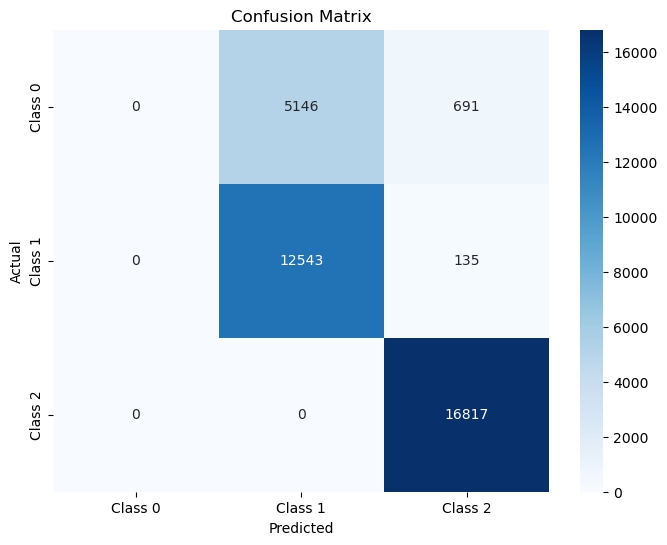

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
